In [156]:
import numpy as np
import menzalib as mz
import pylab as pl
from scipy.optimize import curve_fit
from inspect import signature

In [120]:
def lin(x,a,b):
    return a*x+b

def dsen(x,dx):
    return dx*np.cos(x)
dsin=np.vectorize(dsen)

def Colore(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))


# Determinazione di d
Alla fine l'ha fatto Davide, e gli esce $d=836.019\pm0.434$

In [174]:
zero,dzero=168.63,0.02
dati=np.transpose(np.transpose(np.genfromtxt('Mercurio.csv',delimiter=','))[1:])
thetam,dthetam=np.empty(len(dati)),np.empty(len(dati))
for i in range(len(dati)):
    thetam[i]=dati[i][0]+dati[i][1]/60-zero
    if dati[i][2]!=2.5: dthetam[i]=0.5/60
    else: dthetam[i]=2.5/60
    thetam[i],dthetam[i]=(thetam[i]-zero)*2*np.pi/360,np.sqrt(dthetam[i]**2+dzero**2)*2*np.pi/360
thetar,dthetar=thetam[0],dthetam[0]
thetam,dthetam=thetam[1:],dthetam[1:]
#lambdai=[404.7*3,435.8*2,546.074*1]
lambdai=np.array([404.7*2,435.8*1,546.074*0])
#lambdai=[404.7,435.8,546.074]
x=np.sin(thetar)-np.sin(thetam)
dx=np.sqrt(dsin(thetar,dthetar)**2+dsin(thetam,dthetam)**2)
pl.errorbar(x,lambdai,xerr=dx,fmt=' ')
popt,pcov=mz.curve_fitdx(lin,x,lambdai,dx=dthetam)
x=np.linspace(-0.11,-0.05,10)
y=lin(x,*popt)
pl.plot(x,y)
pl.xlabel('sen(theta_i) - sen(theta_m)')
pl.ylabel('m*lambda')
pl.savefig('strano.png')
print(popt,pcov)
pl.close()


[15313.02305139  1600.52995699] [[5840.99518332  452.18278357]
 [ 452.18278357   37.73100187]]


$d[\sin(\theta_r)-\sin(\theta_i)]=\lambda$

In [175]:
d=836.019;dd=0.434

def func(theta,thetar,theta0,d):
    return d*(np.sin(thetar-theta0)-np.sin(theta-theta0))


$(2.5 \pm 0.1) \times 10^{2}$
$(2.5 \pm 0.1) \times 10^{2}$
$(3.0 \pm 0.2) \times 10^{2}$
$(3.6 \pm 0.2) \times 10^{2}$
$(3.6 \pm 0.2) \times 10^{2}$
$(4.3 \pm 0.2) \times 10^{2}$
$(4.7 \pm 0.2) \times 10^{2}$


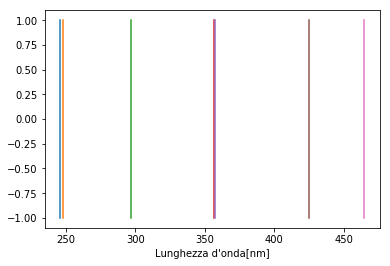

In [181]:
dati=np.transpose(np.transpose(np.genfromtxt('Idrogeno.csv',delimiter=','))[1:])
theta,dtheta=np.empty(len(dati)),np.empty(len(dati))

#calcolo angolo di deflessione theta+-dtheta
for i in range(len(dati)):
    theta[i]=dati[i][0]+dati[i][1]/60-zero
    if dati[i][2]!=2.5: dtheta[i]=0.5/60
    else: dtheta[i]=2.5/60
theta,dtheta=theta*np.pi/180,dtheta*np.pi/180
thetar,dthetar=theta[0],dtheta[0]
theta,dtheta=theta[1:],dtheta[1:]

lung=func(theta,thetar,zero,d)[:-3]
dlung=np.empty(len(lung))
for i in range(len(lung)):
    dlung[i]=mz.dy(func,np.array([theta[i],thetar,zero,d]),([dtheta[i],dthetar,dzero,dd]))
    print(mz.ne_tex(lung[i],dlung[i]))

for col in lung:
    pl.plot([col,col],[1,-1])
pl.xlabel('Lunghezza d\'onda[nm]')
pl.savefig('idrog.png')
pl.show()

In [177]:
657/470

1.397872340425532